In [4]:
import matplotlib.pyplot as plt
import hddm
%matplotlib inline

/Users/mcfrank/anaconda/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


# Explorations of HDDM

Using Python HDDM package. 

# Initial Exploration

Load data.

In [19]:
data = hddm.load_csv('hddm_neginhib10.csv')

Create model.

In [20]:
# Note: need to get response formats set correctly.
data.response = data.response.astype('double')
data.rt = data.rt.astype('double')

model = hddm.HDDM(data)

Make RT figure. 

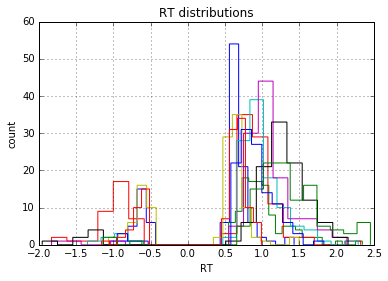

In [26]:
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [22]:
model.find_starting_values()
model.sample(200, burn=20)

 [-----------------100%-----------------] 200 of 200 complete in 3.1 sec

In [23]:
model.print_stats()

               mean         std       2.5q        25q        50q        75q     97.5q       mc err
a           1.81747     0.21779     1.4053     1.6746    1.80445    1.94384   2.28566    0.0193153
a_std      0.799006    0.196172   0.491732   0.650434   0.796678    0.90839   1.24247    0.0201001
a_subj.1    1.02494   0.0478108   0.933087   0.993271    1.02253    1.05736    1.1139   0.00514325
a_subj.2    2.70215    0.331328    2.13034    2.43474    2.71654    2.96287   3.24533    0.0348605
a_subj.3    1.30853   0.0624648    1.20579    1.25907    1.30978    1.35768   1.43133   0.00614133
a_subj.4    1.87633    0.136046    1.65379    1.78182    1.86378     1.9492   2.20506    0.0121287
a_subj.6    2.17395    0.215275     1.7788    2.04973    2.15607    2.31441   2.64281    0.0214328
a_subj.7    1.04023   0.0453529   0.962748     1.0086    1.03704    1.06879   1.13434   0.00390223
a_subj.8     2.3924    0.157801    2.07139    2.28489    2.39713    2.49541   2.70648    0.0160275
a_subj.9  

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std


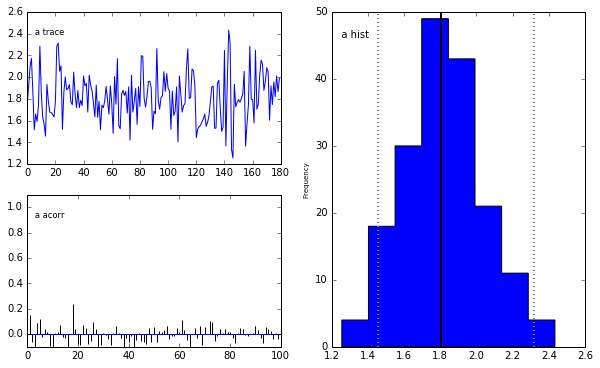

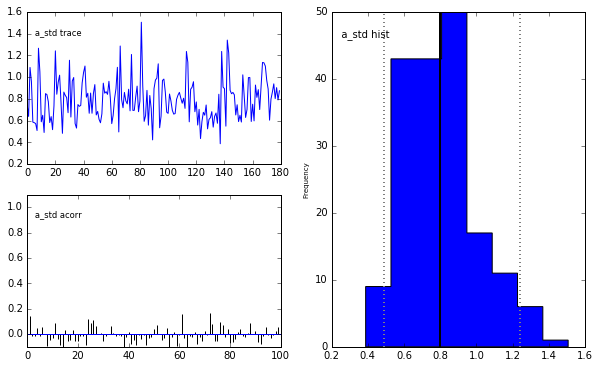

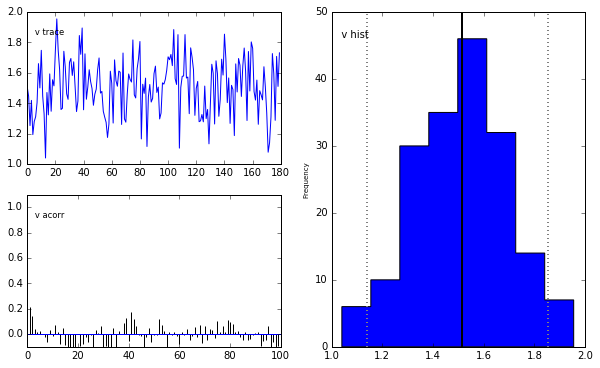

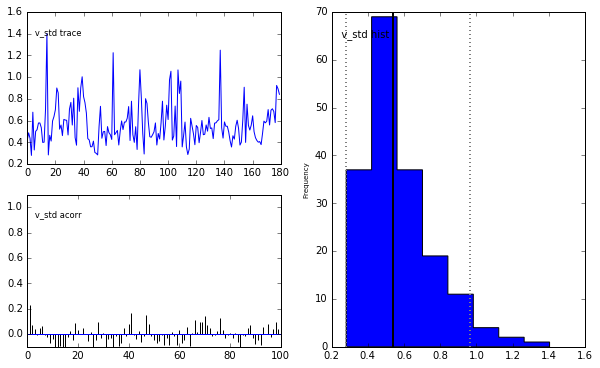

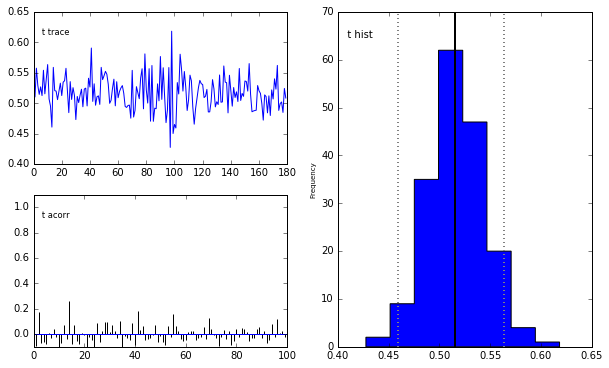

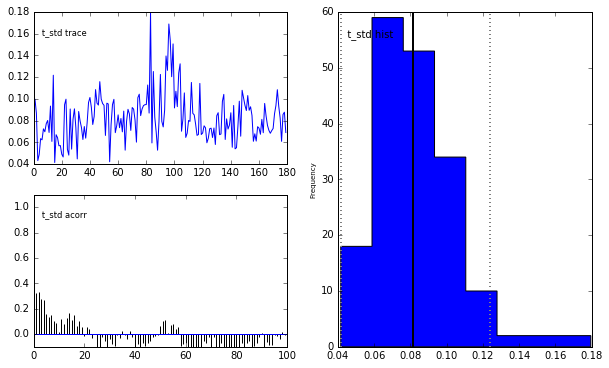

In [24]:
model.plot_posteriors()

# Add stimulus information

Explore dependency of drift rate, boundary separation, and bias on stimulus type. 

In [40]:
m_stim = hddm.HDDM(data, include = ('z'), depends_on={'v': 'stim', 'a': 'stim', 'z': 'stim', 't': 'stim'})
m_stim.find_starting_values()
m_stim.sample(1000, burn=100)

 [-----------------100%-----------------] 1000 of 1000 complete in 32.3 sec

In [41]:
m_stim.print_stats()

                             mean         std        2.5q        25q        50q         75q     97.5q       mc err
a(implicature)            1.69553    0.205917     1.28456    1.56683     1.6807     1.82398   2.09395   0.00788193
a(unambiguous)            1.94372    0.211777     1.53905    1.79719    1.93997     2.07953   2.39473   0.00792507
a_std                    0.654452    0.129751    0.434886   0.561716   0.641175    0.731661  0.953309   0.00598207
a_subj(implicature).1    0.960708   0.0556451    0.861838   0.922349   0.955761    0.997873   1.07952   0.00217907
a_subj(implicature).2     2.33795    0.276819     1.85739    2.13531    2.31121      2.5135   2.92739    0.0200845
a_subj(implicature).3     1.39386   0.0832641     1.23805     1.3359    1.39278     1.44905   1.57375   0.00367161
a_subj(implicature).4     1.73304    0.137042      1.4812    1.64191    1.71972     1.81723   2.01887   0.00728672
a_subj(implicature).6      2.2448    0.221552     1.84669    2.08986    2.22564 

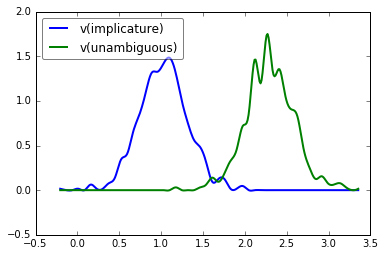

In [35]:
v_targ, v_cntl = m_stim.nodes_db.node[['v(implicature)', 'v(unambiguous)']]
hddm.analyze.plot_posterior_nodes([v_targ, v_cntl])

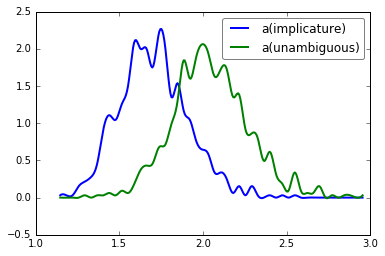

In [36]:
a_targ, a_cntl = m_stim.nodes_db.node[['a(implicature)', 'a(unambiguous)']]
hddm.analyze.plot_posterior_nodes([a_targ, a_cntl])

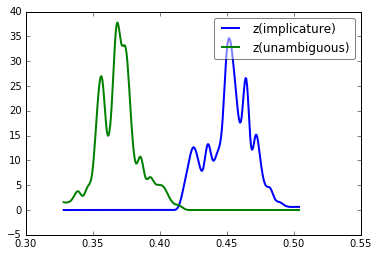

In [42]:
z_targ, z_cntl = m_stim.nodes_db.node[['z(implicature)', 'z(unambiguous)']]
hddm.analyze.plot_posterior_nodes([z_targ, z_cntl])

# Same model with all participants

In [12]:
inf_adult_data = hddm.load_csv('hddm_neginhib_all.csv')

In [13]:
m_inf = hddm.HDDM(inf_adult_data, include = ('z'), depends_on={'v': 'stim', 'a': 'stim', 'z': 'stim', 't': 'stim'})
m_inf.find_starting_values()
m_inf.sample(10000, burn=100)

 [-----------------100%-----------------] 10001 of 10000 complete in 1616.2 sec

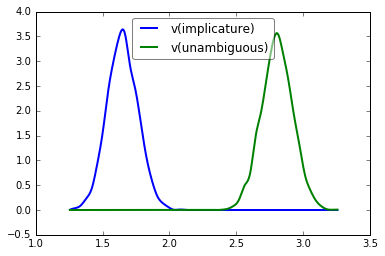

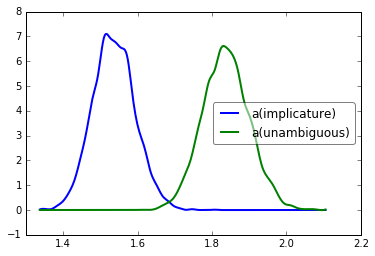

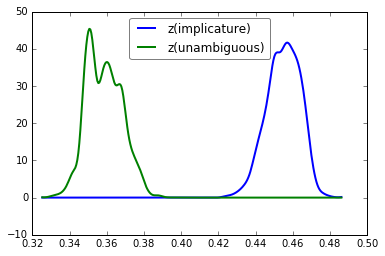

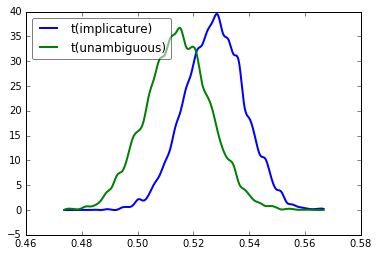

In [14]:
v_targ, v_cntl = m_inf.nodes_db.node[['v(implicature)', 'v(unambiguous)']]
hddm.analyze.plot_posterior_nodes([v_targ, v_cntl])
a_targ, a_cntl = m_inf.nodes_db.node[['a(implicature)', 'a(unambiguous)']]
hddm.analyze.plot_posterior_nodes([a_targ, a_cntl])
z_targ, z_cntl = m_inf.nodes_db.node[['z(implicature)', 'z(unambiguous)']]
hddm.analyze.plot_posterior_nodes([z_targ, z_cntl])
t_targ, t_cntl = m_inf.nodes_db.node[['t(implicature)', 't(unambiguous)']]
hddm.analyze.plot_posterior_nodes([t_targ, t_cntl])

In [49]:
m_inf.print_stats()

                             mean         std       2.5q        25q        50q        75q      97.5q       mc err
a(implicature)            1.53992   0.0563876    1.43451     1.5015    1.54034    1.57891    1.64231   0.00241874
a(unambiguous)            1.83615   0.0606526     1.7216    1.79637    1.83363    1.87805    1.96374   0.00317877
a_std                    0.375563   0.0364379   0.307922   0.350601   0.375333   0.398902   0.451592   0.00210223
a_subj(implicature).1    0.946515   0.0573268   0.835312   0.907776   0.944448   0.979913    1.06881   0.00233333
a_subj(implicature).2     2.19258    0.231668     1.7906    2.02695    2.17924     2.3516    2.68859    0.0153712
a_subj(implicature).3     1.30297   0.0744929     1.1599    1.25246    1.30061    1.35366    1.45596   0.00329273
a_subj(implicature).4     1.69465    0.137038    1.43937    1.59547    1.68997    1.78342    1.98275   0.00787971
a_subj(implicature).6     1.96358    0.186022    1.63359    1.83321    1.94797    2.0831

# SI Tablet

In [5]:
all_data = hddm.load_csv('hddm_si_kids.csv')

In [6]:
m_all = hddm.HDDM(all_data, include = ('z'), depends_on={'v': 'trial_type', 'a': 'trial_type', 'z': 'trial_type', 't': 'trial_type'})
m_all.find_starting_values()
m_all.sample(1000, burn=100)

 [-----------------100%-----------------] 1001 of 1000 complete in 1951.9 sec

In [8]:
m_all.print_stats()

                                mean         std         2.5q          25q         50q          75q        97.5q       mc err
a(all)                       3.65425    0.082528      3.49887      3.59646     3.65469        3.712      3.82699   0.00493297
a(none)                      4.00077   0.0961397      3.82571      3.93002     4.00001       4.0672      4.19216   0.00690756
a(some)                      3.73501    0.088669      3.55104      3.67886     3.73675      3.79561      3.90259   0.00609273
a_std                       0.738665   0.0595128     0.632704     0.694931    0.735145     0.778907     0.857978   0.00494616
a_subj(all).11016_1          3.94813     0.59258      2.89505      3.52765     3.91183      4.30717      5.22558    0.0296351
a_subj(none).11016_1         3.86658    0.461394      3.01899      3.54201     3.83457      4.14357      4.86489    0.0186129
a_subj(some).11016_1          3.3788    0.397188      2.66025      3.11527     3.36324      3.61961      4.18571    0.

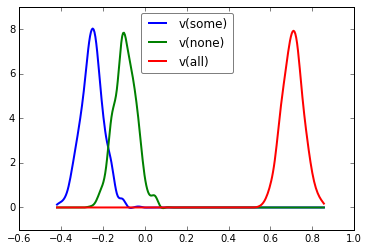

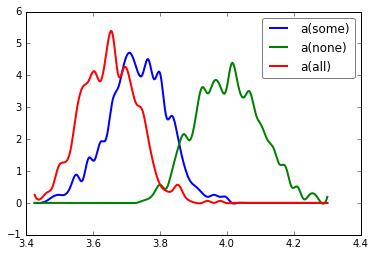

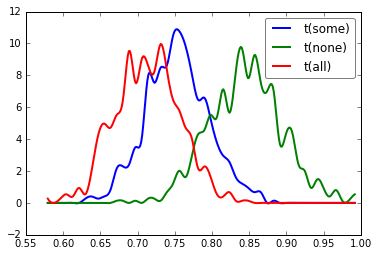

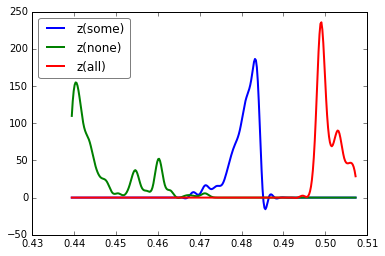

In [11]:
v_none, v_some, v_all = m_all.nodes_db.node[['v(none)', 'v(some)', 'v(all)']]
hddm.analyze.plot_posterior_nodes([v_some, v_none, v_all])
a_none, a_some, a_all = m_all.nodes_db.node[['a(none)', 'a(some)', 'a(all)']]
hddm.analyze.plot_posterior_nodes([a_some, a_none, a_all])
t_none, t_some, t_all = m_all.nodes_db.node[['t(none)', 't(some)', 't(all)']]
hddm.analyze.plot_posterior_nodes([t_some, t_none, t_all])
z_none, z_some, z_all = m_all.nodes_db.node[['z(none)', 'z(some)', 'z(all)']]
hddm.analyze.plot_posterior_nodes([z_some, z_none, z_all])